In [2]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading & Understanding Dataset

In [3]:
# Reading the dataset
Housing_data = pd.read_csv('train.csv')
Housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#checking rows and columns
Housing_data.shape

(1460, 81)

In [4]:
#Checking info
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Get basic idea of data using describe()
Housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Cleaning

In [6]:
#In below column having NA means some meaning so we are replacing NA with "None" so that we do not get confused with this NA's and actual NA values
null_has_meaning = ["BsmtFinType2","BsmtFinType1","BsmtExposure","BsmtCond","BsmtQual","GarageCond","GarageQual","GarageFinish","GarageType","FireplaceQu","PoolQC","Fence","MiscFeature","Alley"]
for i in null_has_meaning:
    Housing_data[i].fillna("None", inplace=True)

In [7]:
#checking the Null percentage in each column
Missing=round(((Housing.isnull().sum())/len(Housing))*100,2).sort_values(ascending=False)
Missing.head(20)

LotFrontage     17.74
GarageYrBlt      5.55
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
KitchenQual      0.00
GarageType       0.00
FireplaceQu      0.00
Fireplaces       0.00
Functional       0.00
TotRmsAbvGrd     0.00
Id               0.00
GarageFinish     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
GrLivArea        0.00
LowQualFinSF     0.00
dtype: float64

In [7]:
# we will delete Id column because it contains only index no and it is no longer usefull
Housing_data.drop(["Id"],axis=1,inplace=True)


In [8]:
#checking Head of dataset
Housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [9]:
# check the null values in the numerical data

Housing_data.select_dtypes(include=['int64','float']).isnull().sum()[Housing_data.select_dtypes(include=['int64','float']).isnull().sum()>0]
                                                                  

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

We will impute missing values in LotFrontage & MasVnrArea column with median

In [10]:
Housing_data.LotFrontage.fillna(Housing_data.LotFrontage.median(),inplace=True)
Housing_data.MasVnrArea.fillna(Housing_data.MasVnrArea.median(),inplace=True)
Housing_data.GarageYrBlt=Housing_data.GarageYrBlt.fillna(0)
Housing_data.GarageYrBlt=Housing_data.GarageYrBlt.astype(int)

In [11]:
# Creating new column PastRemodelled it will determine whether the house has been remodelled or not based on the difference between remodelled and built years
def PastRMDL(K):
    if(K['YearBuilt'] == K['YearRemodAdd']):
        return 0
    elif(K['YearBuilt'] < K['YearRemodAdd']):
        return 1
    else:
        return 2
    
Housing_data['PastRemodelled'] = Housing_data.apply(PastRMDL, axis=1)
Housing_data.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PastRemodelled
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,None,0,5,2007,WD,Normal,181500,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,None,0,9,2008,WD,Normal,223500,1
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,None,0,2,2006,WD,Abnorml,140000,1
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,None,0,12,2008,WD,Normal,250000,0


In [12]:
# Creating a new column named AgeofBuiltOrRemodelled and determine the age of the building at the time of selling

def AgeofBuiltOrRemodelled(k):
    if(k['YearBuilt'] == k['YearRemodAdd']):
        return k['YrSold'] - k['YearBuilt']
    else:
        return k['YrSold'] - k['YearRemodAdd']
       
Housing_data['AgeofBuiltOrRemodelled'] = Housing_data.apply(AgeofBuiltOrRemodelled, axis=1)
Housing_data.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PastRemodelled,AgeofBuiltOrRemodelled
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,0,2,2008,WD,Normal,208500,0,5
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,0,5,2007,WD,Normal,181500,0,31
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,0,9,2008,WD,Normal,223500,1,6
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,0,2,2006,WD,Abnorml,140000,1,36
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,0,12,2008,WD,Normal,250000,0,8


In [13]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
Housing_data['OldOrNewGarage'] = Housing_data['GarageYrBlt'].apply(getGarageConstructionPeriod)
Housing_data.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PastRemodelled,AgeofBuiltOrRemodelled,OldOrNewGarage
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,2,2008,WD,Normal,208500,0,5,1
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,None,0,5,2007,WD,Normal,181500,0,31,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,None,0,9,2008,WD,Normal,223500,1,6,1
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,None,0,2,2006,WD,Abnorml,140000,1,36,0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,None,0,12,2008,WD,Normal,250000,0,8,1


In [14]:
# As we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we would only be using the derived columns for further analysis

Housing_data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [15]:
# check the null values in the categorical data
Housing_data.select_dtypes(include=['object']).isnull().sum()[Housing_data.select_dtypes(include=['object']).isnull().sum()>0]
                                                                  

MasVnrType    8
Electrical    1
dtype: int64

In [16]:
#checking mode of "MasVnrType"
Housing_data["MasVnrType"].mode()

0    None
Name: MasVnrType, dtype: object

In [17]:
#filling Null values of "MasVnrType" with its mode
Housing_data["MasVnrType"].fillna("None", inplace=True)

In [18]:
#checking mode of "Electrical"
Housing_data["Electrical"].mode()

0    SBrkr
Name: Electrical, dtype: object

In [19]:
#filling Null values of "MasVnrType" with its mode
Housing_data["Electrical"].fillna("SBrkr", inplace=True)

In [20]:
#Rechecking the Null percentage in each column
Missing=round(((Housing_data.isnull().sum())/len(Housing_data))*100,2).sort_values(ascending=False)
Missing.head()

MSSubClass      0.0
KitchenQual     0.0
GarageCars      0.0
GarageFinish    0.0
GarageType      0.0
dtype: float64

There is no null values in the data set

Removing categorical & numerical attributes that have more than 85% data associated to one value.
- We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
  to one value

In [22]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighValueCounts():
    column = []
    columns = Housing_data
    for col in (columns):
        if(Housing_data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighValueCounts()

# Remove the columns with skewed data

Housing_data.drop(columnsToBeRemoved, axis = 1, inplace = True)

Housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,PastRemodelled,AgeofBuiltOrRemodelled,OldOrNewGarage
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,548,0,61,None,2,Normal,208500,0,5,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,460,298,0,None,5,Normal,181500,0,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,608,0,42,None,9,Normal,223500,1,6,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,642,0,35,None,2,Abnorml,140000,1,36,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,836,192,84,None,12,Normal,250000,0,8,1


# Check for Duplicates

In [23]:
Housing_data[Housing_data.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,PastRemodelled,AgeofBuiltOrRemodelled,OldOrNewGarage


No duplicate entries found 

In [24]:
# Checking outliers at 25%,50%,75%,90%,95% and 99

Housing_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,PastRemodelled,AgeofBuiltOrRemodelled,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,...,0.613014,1.767123,472.980137,94.244521,46.660274,6.321918,180921.195890,0.476712,22.950000,0.275342
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,...,0.644666,0.747315,213.804841,125.338794,66.256028,2.703626,79442.502883,0.499629,20.640653,0.446840
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,1.000000,334.500000,0.000000,0.000000,5.000000,129975.000000,0.000000,4.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,...,1.000000,2.000000,480.000000,0.000000,25.000000,6.000000,163000.000000,0.000000,14.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,...,1.000000,2.000000,576.000000,168.000000,68.000000,8.000000,214000.000000,1.000000,41.000000,1.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,...,1.000000,3.000000,757.100000,262.000000,130.000000,10.000000,278000.000000,1.000000,56.000000,1.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,...,2.000000,3.000000,850.100000,335.000000,175.050000,11.000000,326100.000000,1.000000,58.000000,1.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,...,2.000000,3.000000,1002.790000,505.460000,285.820000,12.000000,442567.010000,1.000000,60.000000,1.000000


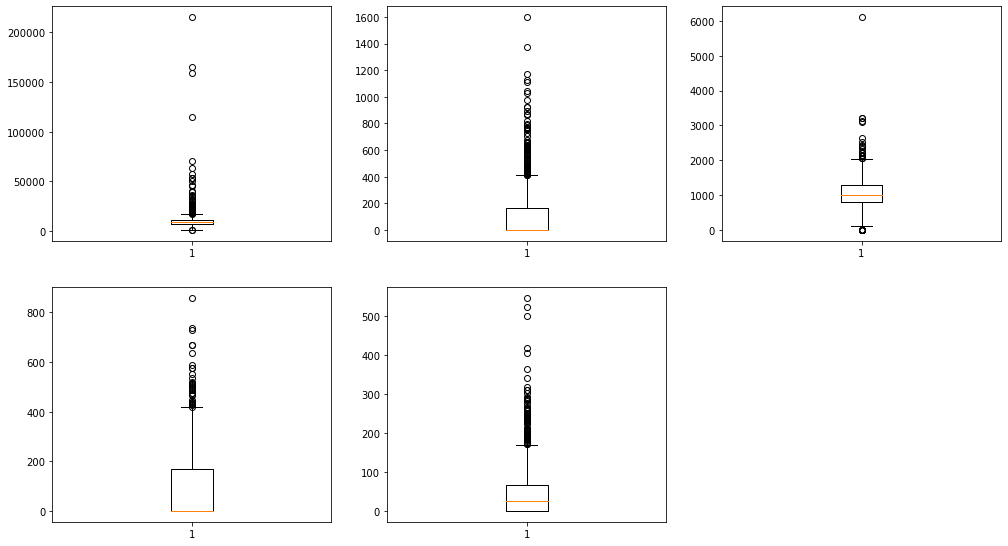

In [26]:
# Check the outliers in the numeric columns

plt.figure(figsize=(17, 25))
plt.subplot(5,3,1)
plt.boxplot( 'LotArea', data = Housing_data)
plt.subplot(5,3,2)
plt.boxplot( 'MasVnrArea', data = Housing_data)
plt.subplot(5,3,3)
plt.boxplot('TotalBsmtSF', data = Housing_data)
plt.subplot(5,3,4)
plt.boxplot( 'WoodDeckSF', data = Housing_data)
plt.subplot(5,3,5)
plt.boxplot( 'OpenPorchSF', data = Housing_data)
plt.show()

In [27]:
# Removing Outliers

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = Housing_data['TotalBsmtSF'].quantile(0.99)
Housing_data = Housing_data[Housing_data["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = Housing_data['OpenPorchSF'].quantile(0.99)
Housing_data = Housing_data[Housing_data["OpenPorchSF"] < nn_quartile_OpenPorchSF]

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = Housing_data['LotArea'].quantile(0.98)
Housing_data = Housing_data[Housing_data["LotArea"] < nn_quartile_LotArea]



# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = Housing_data['WoodDeckSF'].quantile(0.99)
Housing_data = Housing_data[Housing_data["WoodDeckSF"] < nn_quartile_WoodDeckSF]


# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = Housing_data['MasVnrArea'].quantile(0.98)
Housing_data = Housing_data[Housing_data["MasVnrArea"] < nn_quartile_MasVnrArea]



In [28]:
# Determine the percentage of data retained

num_data = round(100*(len(Housing_data)/1460),2)
print(num_data)

93.01


# Data Visualisation

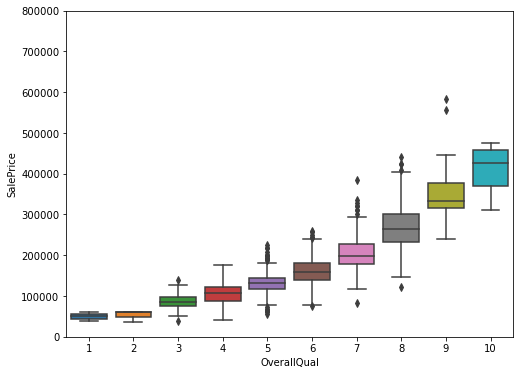

In [29]:
#boxplot overallqual/saleprice
var = "OverallQual"
data = pd.concat([Housing_data['SalePrice'],Housing_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.show()

#### Here we can see as price increasing quality of house is also increasing we have the low price for the very poor quality 
      10 	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

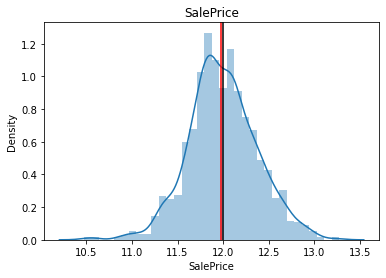

In [30]:
#Cheking whether our dependant variable column is normally distributed or not

Housing_data['SalePrice'] = np.log1p(Housing_data['SalePrice'])
plt.title('SalePrice')
sns.distplot(Housing_data['SalePrice'])
plt.axvline(Housing_data['SalePrice'].mean(), c="black")
plt.axvline(Housing_data['SalePrice'].median(), c="red")
plt.show()

The target value seems to be normalized with some noise.

In [31]:
from scipy import stats
print("Skewness",Housing_data['SalePrice'].skew())
print("Kurtosis",Housing_data['SalePrice'].kurt())

Skewness -0.008381848043950719
Kurtosis 0.6115461068970527


In [32]:
#Taking all numerical columns in a list except 'SalePrice'
num_cols = Housing_data.describe().columns.to_list()
num_cols = num_cols[1:]
num_cols.remove('SalePrice')
num_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'PastRemodelled',
 'AgeofBuiltOrRemodelled',
 'OldOrNewGarage']

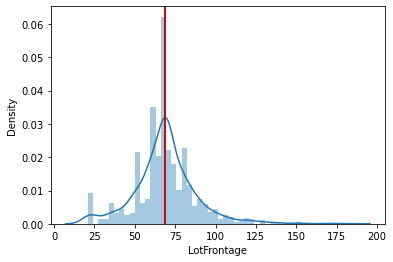

Skewness 0.6496466046165215
Kurtosis 3.3636245234634017


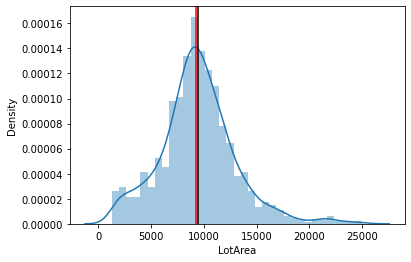

Skewness 0.5802786221497553
Kurtosis 1.6718948542365957


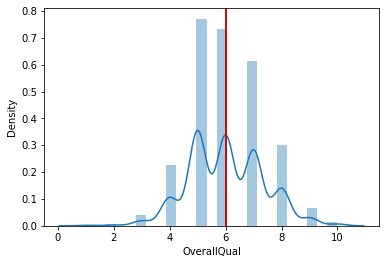

Skewness 0.10832841005838102
Kurtosis 0.04601545500449156


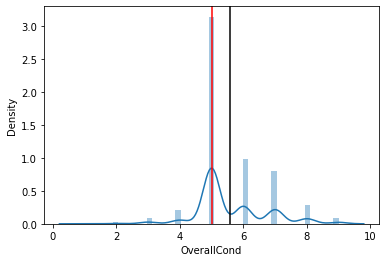

Skewness 0.66593966021979
Kurtosis 1.0820535197333787


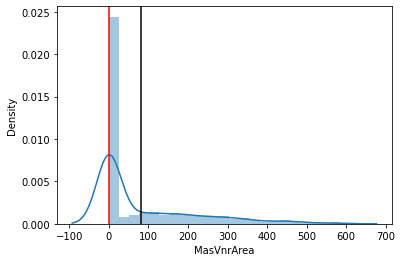

Skewness 1.6040327345204415
Kurtosis 1.7658333584288735


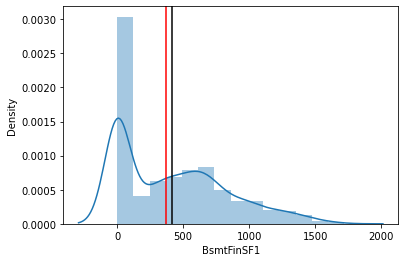

Skewness 0.6990611080139666
Kurtosis -0.40568817545319424


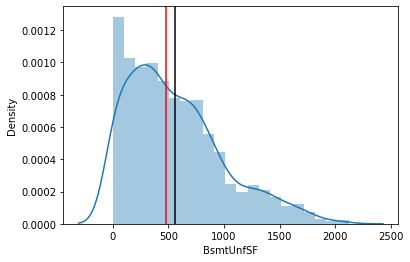

Skewness 0.8772388553650127
Kurtosis 0.339211750625243


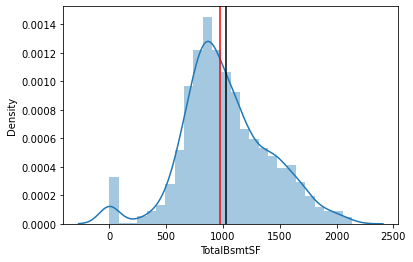

Skewness 0.10232347348887658
Kurtosis 0.48825310157007085


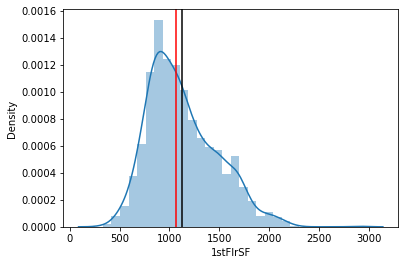

Skewness 0.705244273202565
Kurtosis 0.30095197992095457


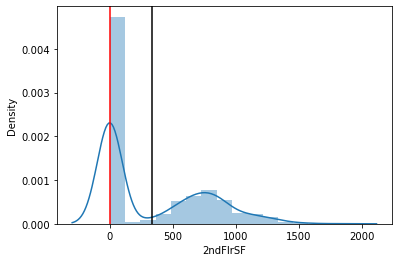

Skewness 0.7665094068419093
Kurtosis -0.7817364288329118


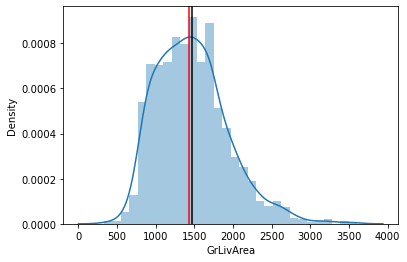

Skewness 0.7811678423507007
Kurtosis 0.9840533975385397


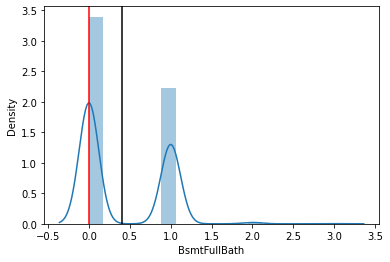

Skewness 0.6056810079141286
Kurtosis -0.9099190071570824


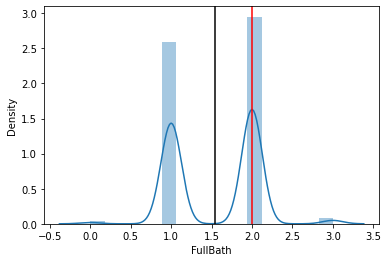

Skewness 0.0014794710901886378
Kurtosis -1.038866685689386


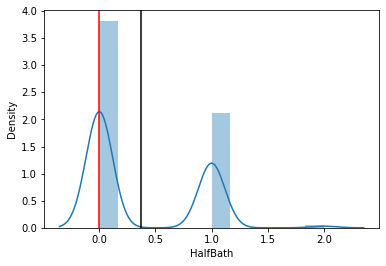

Skewness 0.740522561070597
Kurtosis -0.949160701473704


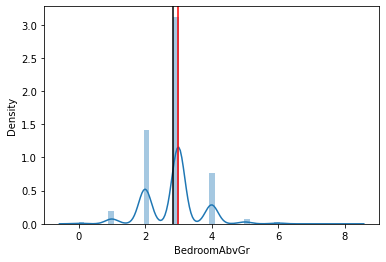

Skewness 0.2674774537952885
Kurtosis 2.4389099137999684


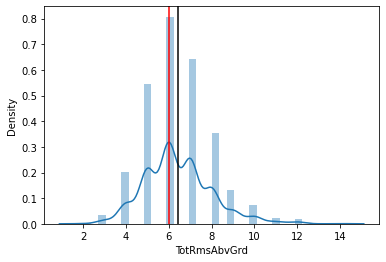

Skewness 0.6635589375755899
Kurtosis 1.085239265456273


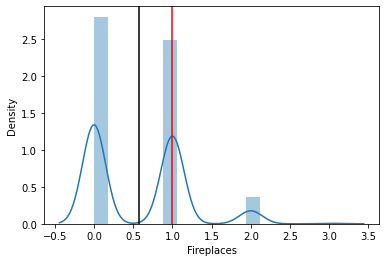

Skewness 0.6615855966951997
Kurtosis -0.24765154199099237


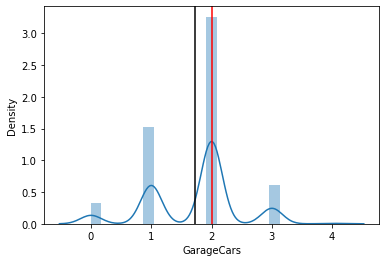

Skewness -0.35677273325306746
Kurtosis 0.23941302073895043


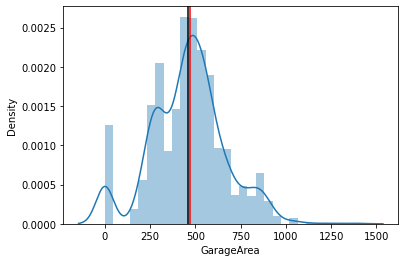

Skewness 0.03794366289002541
Kurtosis 0.6416641948922277


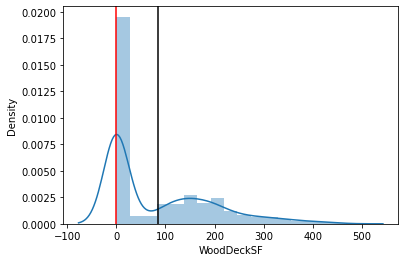

Skewness 1.0703092016030857
Kurtosis 0.25475232008512494


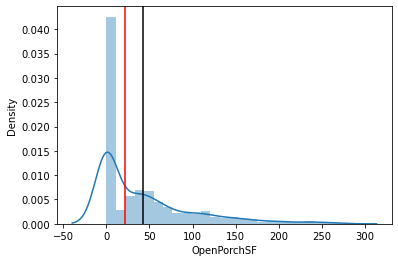

Skewness 1.608281171218532
Kurtosis 2.3151237752957807


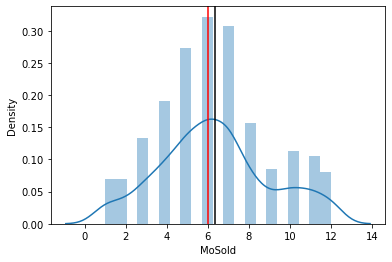

Skewness 0.22835511033965872
Kurtosis -0.40948876225766684


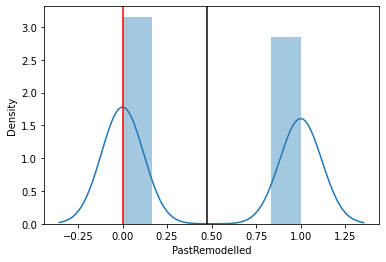

Skewness 0.10334420286403978
Kurtosis -1.9922562529893906


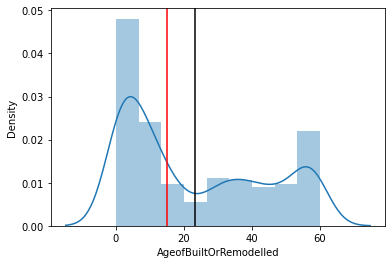

Skewness 0.47968505629349284
Kurtosis -1.3042621555143121


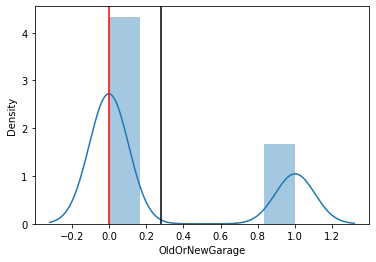

Skewness 0.9942872699598099
Kurtosis -1.0128867300540323


In [33]:
# Cheking other numerical independant variables distribution except 'SalePrice' because we have already seen its distribution in above code
for i in num_cols:
    sns.distplot(Housing_data[i])
    plt.axvline(Housing_data[i].mean(), c="black")
    plt.axvline(Housing_data[i].median(), c="red")
    plt.show()
    print("Skewness",Housing_data[i].skew())
    print("Kurtosis",Housing_data[i].kurt())
    print("="*70)

 we have seen the other independant variables distributionas as well and its skewness

<Figure size 720x360 with 0 Axes>

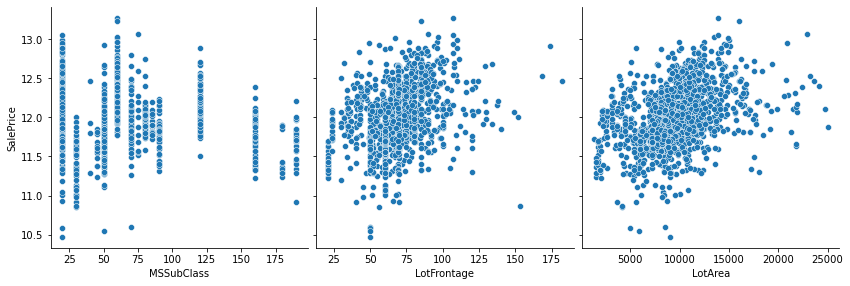

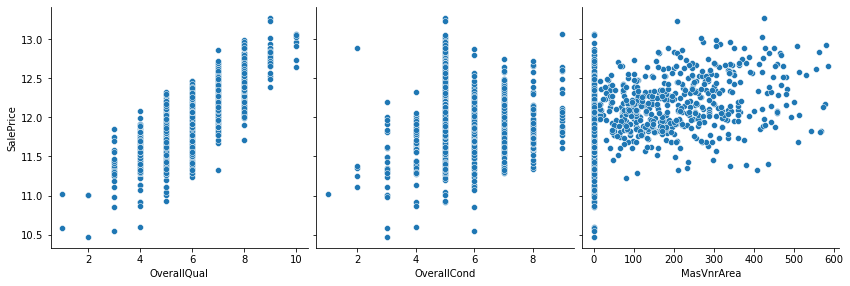

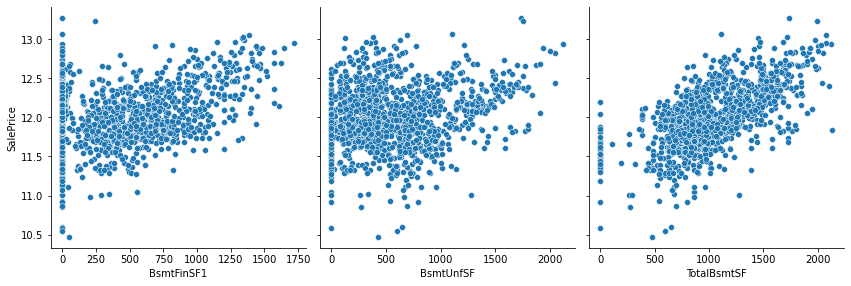

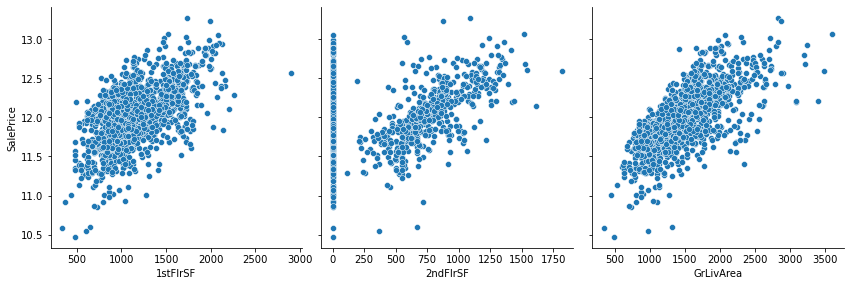

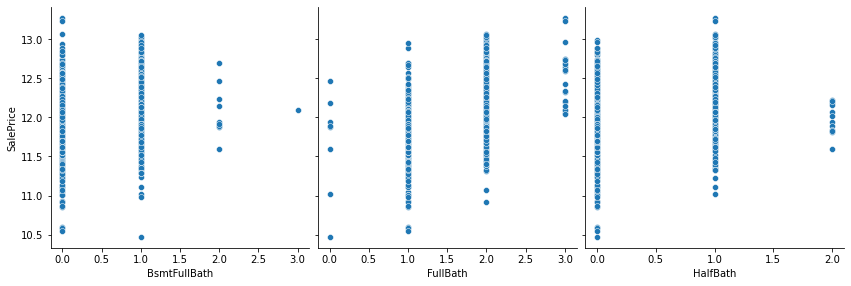

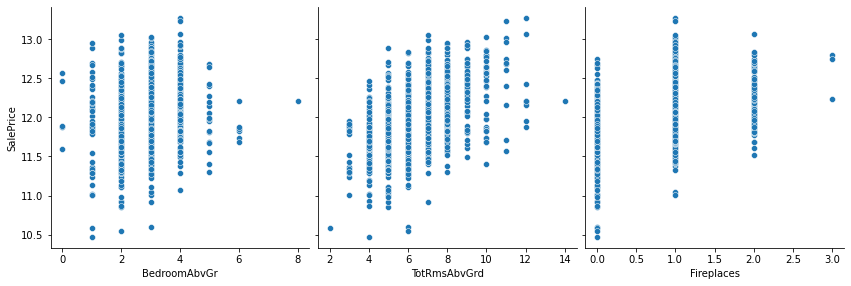

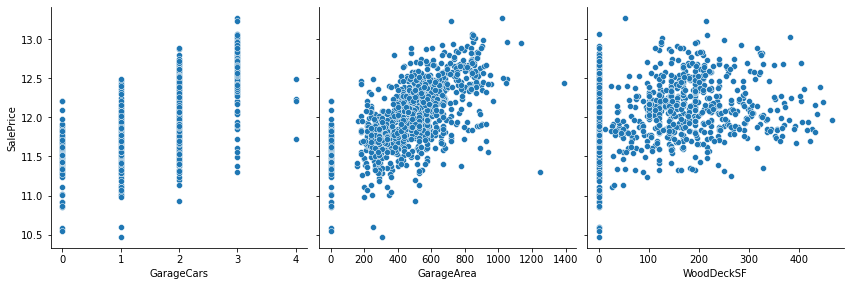

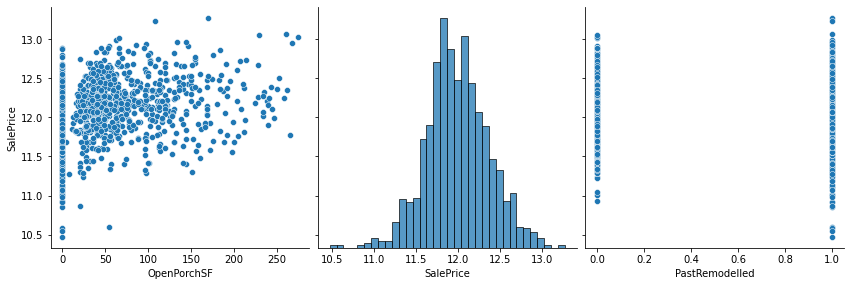

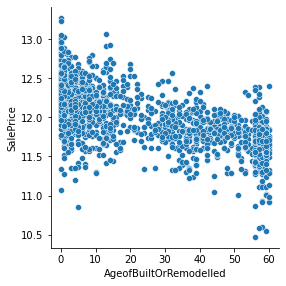

In [34]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(Housing_data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing_data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing_data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing_data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing_data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing_data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing_data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing_data, x_vars=['OpenPorchSF','SalePrice', 'PastRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing_data, x_vars=['AgeofBuiltOrRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()



- 1stFlrSF, GrLivArea seems to be showing correlation towards right


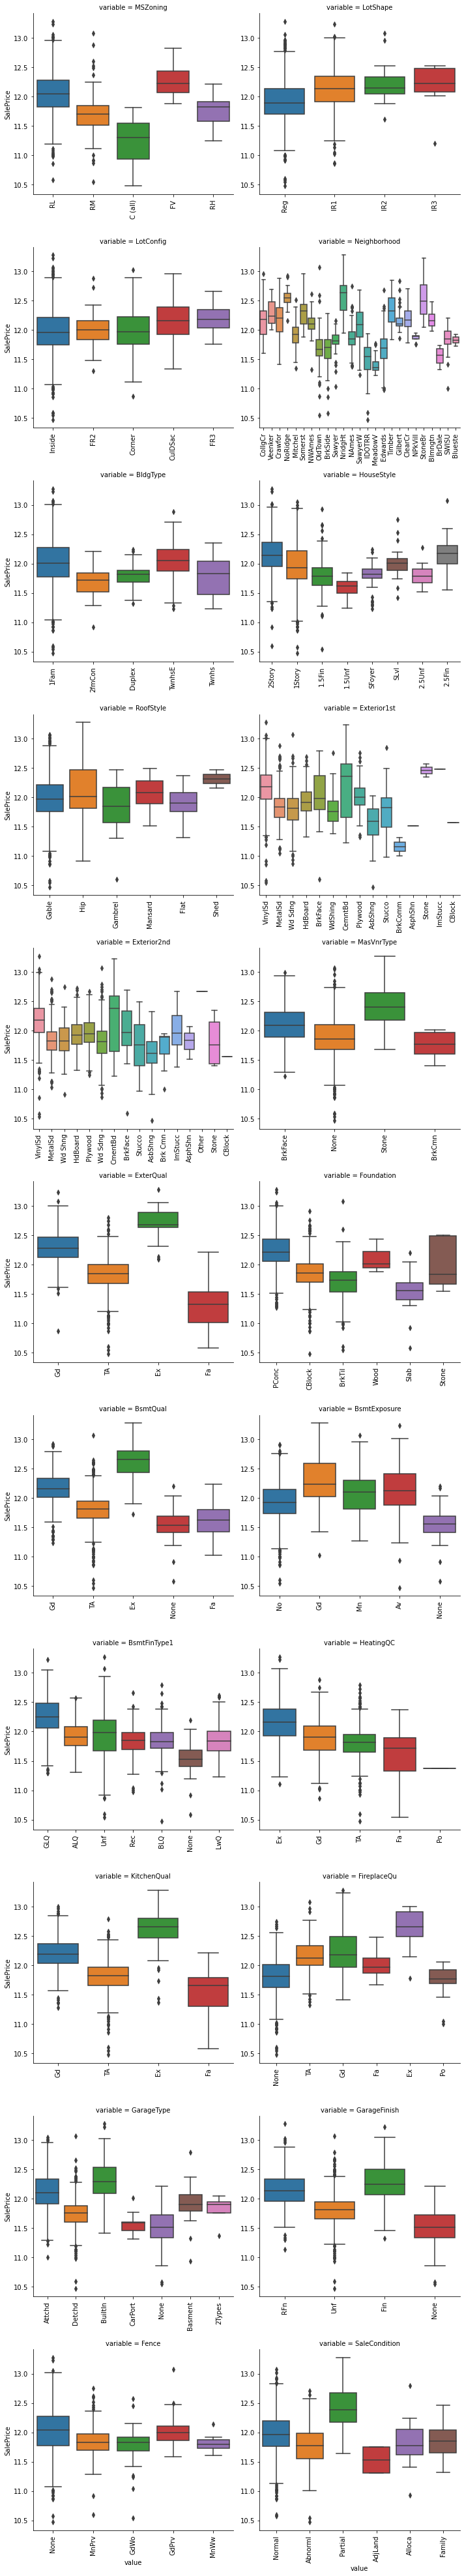

In [35]:
qualitative = [f for f in Housing_data.columns if Housing_data.dtypes[f] == 'object']
for c in qualitative:
    Housing_data[c] = Housing_data[c].astype('category')
    if Housing_data[c].isnull().any():
        Housing_data[c] = Housing_data[c].fillna('MISSING')
        Housing_data[c] = Housing_data[c].cat.add_categories(['MISSING'])
       

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(Housing_data, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")


Most of these variables have a diverse relationship with the 'Sales' and we will try to define some of them below -

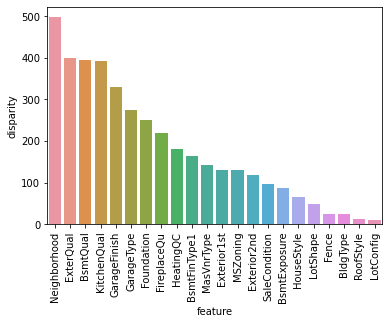

In [36]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(Housing_data)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

From the above chart we can see that some of the majorly influencing variables are -
- Neighbourhood
- ExterQuality
- Basement Quality
- KitchenQuality

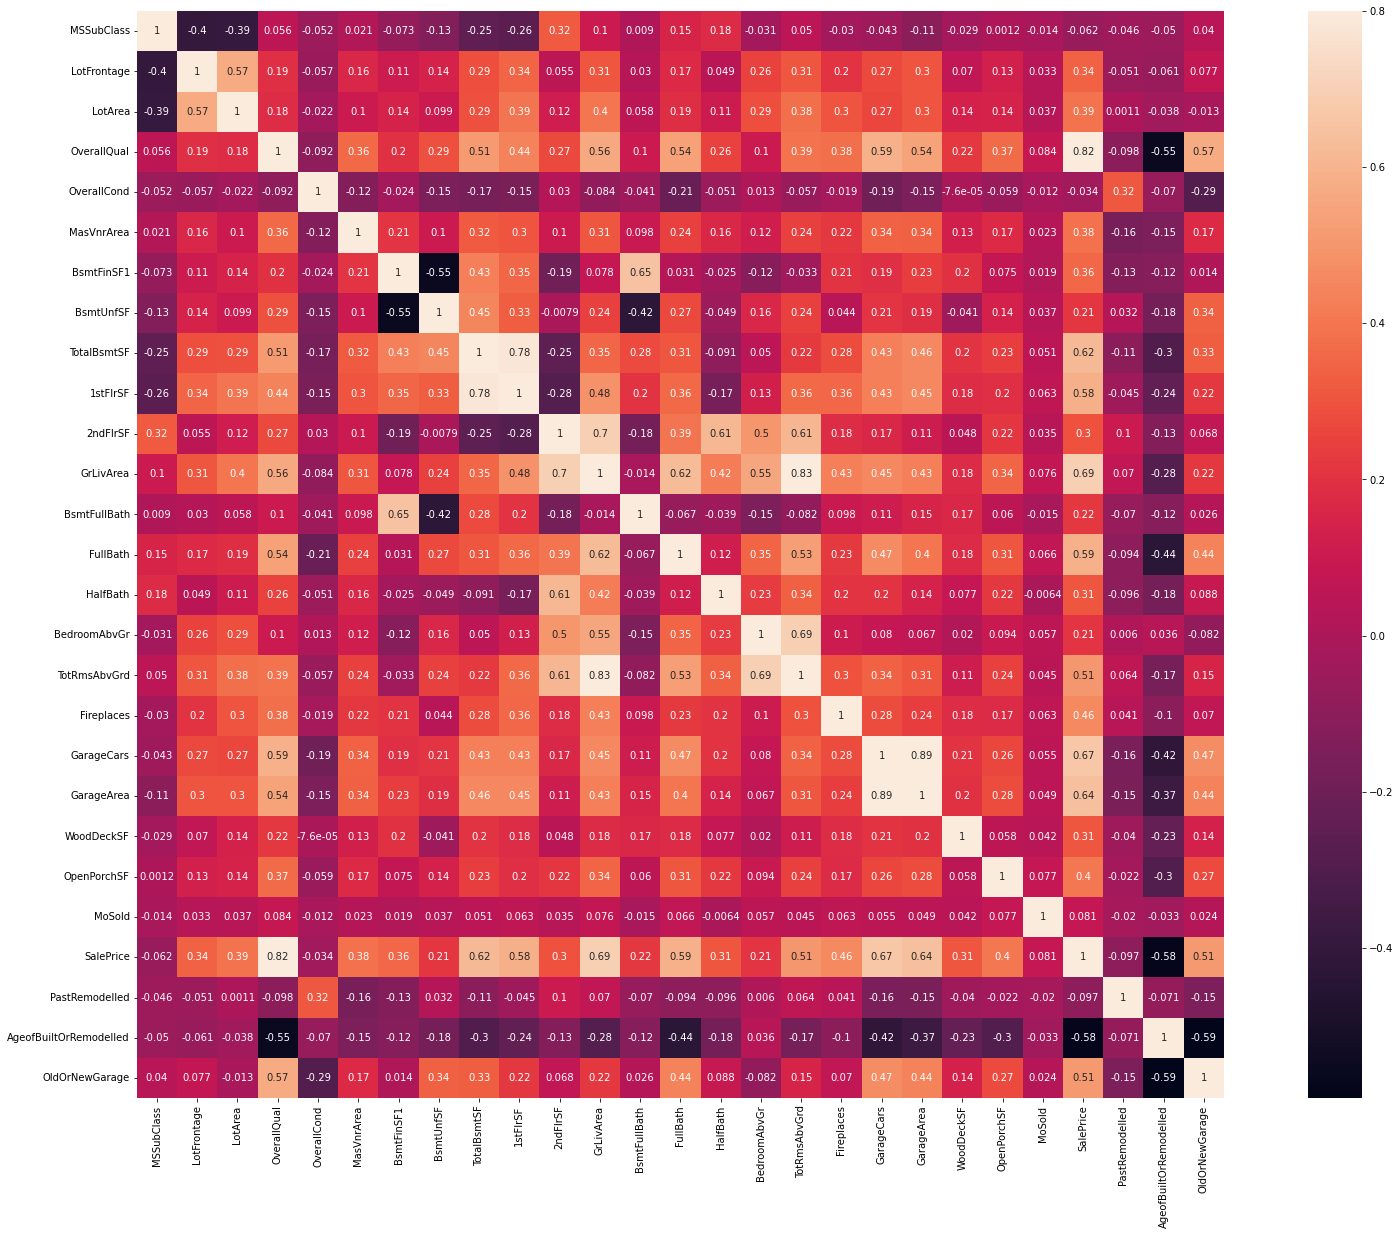

In [37]:
# Correlation Matrix
corrmat = Housing_data.corr()
f, ax = plt.subplots(figsize=(30,20))
sns.heatmap(corrmat, vmax=.8, square=True,annot =True)
plt.show()

Here we can not see clearly so we will get the top 10 corellated variables 

In [38]:
# Checking the largest correlated variables
k=10
corrmat.nlargest(k, "SalePrice")

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,PastRemodelled,AgeofBuiltOrRemodelled,OldOrNewGarage
SalePrice,-0.062198,0.337817,0.388110,0.816156,-0.034118,0.383482,0.356718,0.213116,0.619675,0.583597,...,0.461584,0.666371,0.641433,0.308330,0.403181,0.081249,1.000000,-0.096693,-0.581112,0.510654
OverallQual,0.055705,0.192678,0.180915,1.000000,-0.091556,0.364609,0.198486,0.290532,0.514596,0.435732,...,0.379599,0.589752,0.542506,0.220924,0.368365,0.084198,0.816156,-0.098376,-0.551077,0.566679
GrLivArea,0.102873,0.306441,0.400537,0.559294,-0.084133,0.307580,0.077981,0.240038,0.349275,0.484663,...,0.427915,0.452907,0.428044,0.178237,0.344793,0.076207,0.693758,0.069718,-0.284399,0.218977
GarageCars,-0.042715,0.268167,0.265541,0.589752,-0.186013,0.339473,0.194856,0.210468,0.429271,0.425235,...,0.279310,1.000000,0.885948,0.205203,0.263121,0.055392,0.666371,-0.158753,-0.416326,0.472858
GarageArea,-0.108191,0.299998,0.301750,0.542506,-0.147919,0.336879,0.234413,0.185667,0.455095,0.453686,...,0.235826,0.885948,1.000000,0.199457,0.280150,0.049464,0.641433,-0.151978,-0.367029,0.437691
TotalBsmtSF,-0.248225,0.288547,0.292976,0.514596,-0.173237,0.318422,0.426573,0.449803,1.000000,0.782564,...,0.279576,0.429271,0.455095,0.202471,0.234599,0.050668,0.619675,-0.108065,-0.299456,0.329736
FullBath,0.148367,0.169155,0.186990,0.537195,-0.213635,0.240716,0.030673,0.270014,0.308171,0.361596,...,0.226918,0.466091,0.402619,0.178971,0.308605,0.066197,0.588688,-0.094108,-0.437817,0.437057
1stFlrSF,-0.255708,0.343633,0.393782,0.435732,-0.154942,0.302869,0.351867,0.328374,0.782564,1.000000,...,0.356940,0.425235,0.453686,0.184886,0.195909,0.062960,0.583597,-0.044587,-0.239964,0.222231
OldOrNewGarage,0.040112,0.076517,-0.012827,0.566679,-0.290574,0.170884,0.013644,0.335640,0.329736,0.222231,...,0.069914,0.472858,0.437691,0.136981,0.274220,0.024193,0.510654,-0.147476,-0.592545,1.000000
TotRmsAbvGrd,0.049795,0.306033,0.377453,0.387128,-0.057025,0.241710,-0.033068,0.243087,0.224905,0.362620,...,0.296316,0.341802,0.307566,0.110640,0.240587,0.044924,0.506156,0.064022,-0.173010,0.150923


In [39]:
# checking top 10 correlated columns
corrmat.nlargest(k, "SalePrice")['SalePrice']

SalePrice         1.000000
OverallQual       0.816156
GrLivArea         0.693758
GarageCars        0.666371
GarageArea        0.641433
TotalBsmtSF       0.619675
FullBath          0.588688
1stFlrSF          0.583597
OldOrNewGarage    0.510654
TotRmsAbvGrd      0.506156
Name: SalePrice, dtype: float64

In [40]:
# Taking top 10 correlated columns in a list
A=corrmat.nlargest(k, "SalePrice")['SalePrice'].index

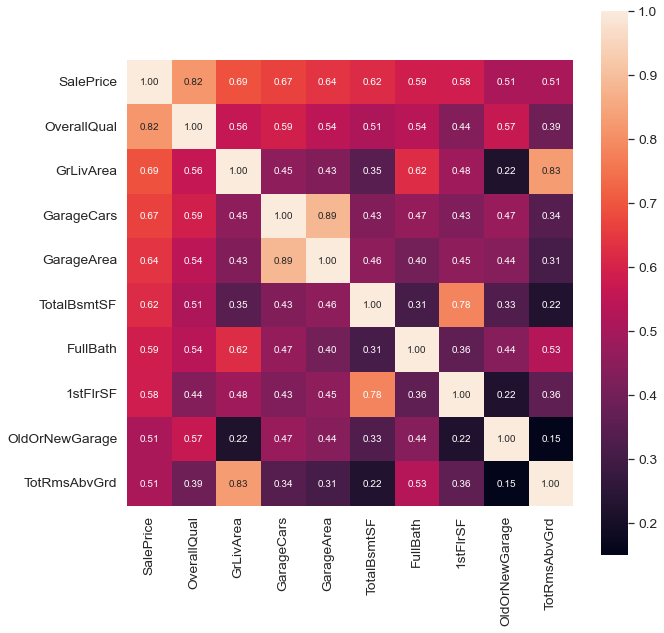

In [41]:
# Visualising top 10 correlated variables
k = 10
plt.figure(figsize = (10, 10))
cm = np.corrcoef(Housing_data[A].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f",
                annot_kws={"size":10}, yticklabels=A.values, xticklabels=A.values)
plt.show()

Removing following columns which shows high correlation
- TotRmsAbvGrd and GrLivArea show 82%
- Garage Area and Garage Cars show 88%

In [42]:
# Removing the highly correlated variables

Housing_data.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [43]:
# Our dataset has one row with null entry -> droping that
Housing_data.dropna(inplace=True)

## Now we will determine te datatype of all remaining features

In [44]:
types_train = Housing_data.dtypes
num_train = types_train[(types_train == 'int64') | (types_train=='float64')]
cat_train = types_train[types_train=='category']

In [45]:
num_train

MSSubClass                  int64
LotFrontage               float64
LotArea                     int64
OverallQual                 int64
OverallCond                 int64
MasVnrArea                float64
BsmtFinSF1                  int64
BsmtUnfSF                   int64
TotalBsmtSF                 int64
1stFlrSF                    int64
2ndFlrSF                    int64
GrLivArea                   int64
BsmtFullBath                int64
FullBath                    int64
HalfBath                    int64
BedroomAbvGr                int64
Fireplaces                  int64
GarageCars                  int64
WoodDeckSF                  int64
OpenPorchSF                 int64
MoSold                      int64
SalePrice                 float64
PastRemodelled              int64
AgeofBuiltOrRemodelled      int64
OldOrNewGarage              int64
dtype: object

In [46]:
cat_train

MSZoning         category
LotShape         category
LotConfig        category
Neighborhood     category
BldgType         category
HouseStyle       category
RoofStyle        category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
ExterQual        category
Foundation       category
BsmtQual         category
BsmtExposure     category
BsmtFinType1     category
HeatingQC        category
KitchenQual      category
FireplaceQu      category
GarageType       category
GarageFinish     category
Fence            category
SaleCondition    category
dtype: object

In [45]:
categorical_values_train = list(cat_train.index)
categorical_values_train

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'Fence',
 'SaleCondition']

In [46]:
numerical_values_train = list(num_train.index)
numerical_values_train

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'SalePrice',
 'PastRemodelled',
 'AgeofBuiltOrRemodelled',
 'OldOrNewGarage']

# Data Preparation

Converting categorical data into numercal data

In [49]:
Housing_data['d_FireplaceQu'] = Housing_data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
Housing_data['d_LotShape'] = Housing_data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
Housing_data['d_SaleCondition'] = Housing_data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
Housing_data['d_BsmtExposure'] = Housing_data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
Housing_data['d_KitchenQual'] = Housing_data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
Housing_data['d_BsmtQual'] = Housing_data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
Housing_data['d_ExterQual'] = Housing_data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
Housing_data['d_BsmtFinType1'] = Housing_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
Housing_data['d_MasVnrType'] = Housing_data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
Housing_data['d_HeatingQC'] = Housing_data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
Housing_data['d_GarageFinish'] = Housing_data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
Housing_data['d_BldgType'] = Housing_data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
Housing_data['d_HouseStyle'] = Housing_data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
Housing_data['d_Fence'] = Housing_data['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
Housing_data['d_LotConfig'] = Housing_data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })


Housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,d_BsmtQual,d_ExterQual,d_BsmtFinType1,d_MasVnrType,d_HeatingQC,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,4,4,6,1,5,2,1,4,0,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,4,3,5,0,5,2,1,1,0,2
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,4,4,6,1,5,2,1,4,0,5
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,3,3,5,0,4,1,1,4,0,4
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,4,4,6,1,5,2,1,4,0,2


In [50]:
# drop the old columns from which the new columns were derived

Housing_data = Housing_data.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

Housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_BsmtQual,d_ExterQual,d_BsmtFinType1,d_MasVnrType,d_HeatingQC,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,4,4,6,1,5,2,1,4,0,5
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,4,3,5,0,5,2,1,1,0,2
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,4,4,6,1,5,2,1,4,0,5
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,3,3,5,0,4,1,1,4,0,4
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,4,4,6,1,5,2,1,4,0,2


### Getting Dummies of Categorical variables

In [51]:
d_GarageType = pd.get_dummies(Housing_data['GarageType'], prefix='GarageType', drop_first = True)
Housing_data = pd.concat([Housing_data, d_GarageType], axis = 1)
d_Exterior1st = pd.get_dummies(Housing_data['Exterior1st'], prefix='Exterior1st', drop_first = True)
Housing_data = pd.concat([Housing_data, d_Exterior1st], axis = 1)
d_Exterior2nd = pd.get_dummies(Housing_data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
Housing_data = pd.concat([Housing_data, d_Exterior2nd], axis = 1)
d_Foundation = pd.get_dummies(Housing_data['Foundation'], prefix='Foundation', drop_first = True)
Housing_data = pd.concat([Housing_data, d_Foundation], axis = 1)
d_MSZoning = pd.get_dummies(Housing_data['MSZoning'], prefix='MSZoning', drop_first = True)
Housing_data = pd.concat([Housing_data, d_MSZoning], axis = 1)
d_RoofStyle = pd.get_dummies(Housing_data['RoofStyle'], prefix='RoofStyle', drop_first = True)
Housing_data = pd.concat([Housing_data, d_RoofStyle], axis = 1)
d_Neighborhood = pd.get_dummies(Housing_data['Neighborhood'], prefix='Neighborhood', drop_first = True)
Housing_data = pd.concat([Housing_data, d_Neighborhood], axis = 1)


Housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,0,0,0,0,0,0


In [52]:
# drop the below columns as we now have new columns derived from these columns

Housing_data= Housing_data.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

Housing_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,0,0,0,0,0,0


In [53]:
# Putting all feature variable to X

X = Housing_data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,0,0,0,0,0,0


## Train Test Split

In [54]:
# Putting all feature variable to X

X = Housing_data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,0,0,0,0,0,0


In [55]:
# placing dependant variable to y

y = Housing_data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [56]:
# Scalling
from sklearn.preprocessing import scale

In [57]:

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker'],
      dtype='object', length=112)

In [58]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [59]:
X.shape

(1358, 112)

## Since there are 112 variables so we will use RFE to select some feature

In [59]:
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [60]:
# Import RFE
from sklearn.feature_selection import RFE

In [76]:
# Running RFE with 60 variables as output

rfe = RFE(lm, n_features_to_select=60)
rfe = rfe.fit ( X_train , y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [77]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [78]:
# Assign the 60 columns to X_train_rfe

X_train_rfe = X_train[col]

In [86]:
# Associate the new 60 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Ridge

### Model Building and Evaluation

In [87]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
len(params["alpha"])

28

In [88]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [89]:
# Applying Lasso
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003387,0.000813,0.001611,0.000511,0.0001,{'alpha': 0.0001},-0.079059,-0.085093,-0.082163,-0.084412,...,-0.082323,0.002226,25,-0.075084,-0.072453,-0.074273,-0.073974,-0.074491,-0.074055,0.00088
1,0.002459,0.000528,0.001810,0.000405,0.001,{'alpha': 0.001},-0.079059,-0.085093,-0.082163,-0.084412,...,-0.082323,0.002226,24,-0.075084,-0.072453,-0.074273,-0.073974,-0.074491,-0.074055,0.00088
2,0.001600,0.000490,0.000799,0.000399,0.01,{'alpha': 0.01},-0.079057,-0.085093,-0.082162,-0.084411,...,-0.082323,0.002226,23,-0.075084,-0.072453,-0.074273,-0.073974,-0.074490,-0.074055,0.00088
3,0.003104,0.005720,0.000352,0.000704,0.05,{'alpha': 0.05},-0.079051,-0.085093,-0.082160,-0.084408,...,-0.082320,0.002228,22,-0.075086,-0.072453,-0.074272,-0.073972,-0.074489,-0.074054,0.00088
4,0.003133,0.006265,0.000000,0.000000,0.1,{'alpha': 0.1},-0.079044,-0.085094,-0.082159,-0.084404,...,-0.082317,0.002230,21,-0.075087,-0.072454,-0.074271,-0.073971,-0.074487,-0.074054,0.00088


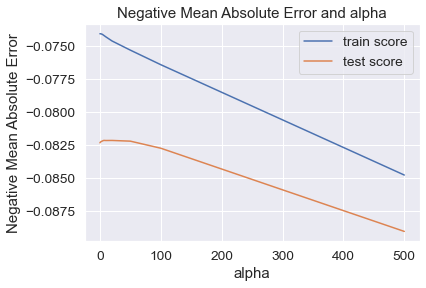

In [91]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [92]:
model_cv.best_params_

{'alpha': 7.0}

In [93]:
# check the coefficient values with lambda = 6

alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01023193,  0.00787285,  0.02136691,  0.07213716,  0.03949708,
        0.02108293, -0.00917407,  0.05183303,  0.10751453,  0.00940894,
        0.01209994,  0.01788798,  0.02461581,  0.01082946,  0.00751498,
       -0.01675323, -0.02592328,  0.01369721,  0.0175205 ,  0.01171787,
        0.01450257,  0.01233119,  0.01451084,  0.01442059,  0.02592247,
        0.01354195, -0.01368395,  0.02547957,  0.01118012,  0.02562511,
       -0.01223396,  0.01138387, -0.00204028, -0.02659532, -0.00973665,
       -0.03102933, -0.03044342, -0.00204028,  0.0253318 ,  0.01734829,
        0.01449269,  0.01983034,  0.03740728,  0.0156225 ,  0.03875466,
        0.01948821,  0.06728135,  0.04682108, -0.04565768, -0.00641025,
       -0.04349641, -0.0093445 , -0.01357504,  0.02225998, -0.00729477,
       -0.00702974,  0.01721875, -0.01598522,  0.00858476,  0.01771344])

In [94]:
# Checking the mean-squared-error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ridge.predict(X_test))


0.01581902227875962

In [95]:
# Put the Features and coefficienst in a dataframe

ridge_data = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_data.reset_index(drop=True, inplace=True)
ridge_data

,Features,Coefficient
0,MSSubClass,-0.0102
1,LotFrontage,0.0079
2,LotArea,0.0214
3,OverallQual,0.0721
4,OverallCond,0.0395
5,BsmtFinSF1,0.0211
6,BsmtUnfSF,-0.0092
7,TotalBsmtSF,0.0518
8,GrLivArea,0.1075
9,BsmtFullBath,0.0094


In [96]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0102,
 'LotFrontage': 0.0079,
 'LotArea': 0.0214,
 'OverallQual': 0.0721,
 'OverallCond': 0.0395,
 'BsmtFinSF1': 0.0211,
 'BsmtUnfSF': -0.0092,
 'TotalBsmtSF': 0.0518,
 'GrLivArea': 0.1075,
 'BsmtFullBath': 0.0094,
 'FullBath': 0.0121,
 'HalfBath': 0.0179,
 'GarageCars': 0.0246,
 'WoodDeckSF': 0.0108,
 'OpenPorchSF': 0.0075,
 'PastRemodelled': -0.0168,
 'AgeofBuiltOrRemodelled': -0.0259,
 'OldOrNewGarage': 0.0137,
 'd_FireplaceQu': 0.0175,
 'd_SaleCondition': 0.0117,
 'd_BsmtExposure': 0.0145,
 'd_KitchenQual': 0.0123,
 'd_BsmtQual': 0.0145,
 'd_BsmtFinType1': 0.0144,
 'd_HeatingQC': 0.0259,
 'd_GarageFinish': 0.0135,
 'd_BldgType': -0.0137,
 'GarageType_Attchd': 0.0255,
 'GarageType_BuiltIn': 0.0112,
 'GarageType_Detchd': 0.0256,
 'Exterior1st_BrkComm': -0.0122,
 'Exterior1st_BrkFace': 0.0114,
 'Exterior1st_CBlock': -0.002,
 'Exterior1st_CemntBd': -0.0266,
 'Exterior1st_HdBoard': -0.0097,
 'Exterior1st_VinylSd': -0.031,
 'Exterior1st_Wd Sdng': -0.0304,
 'Exterior2nd_

In [112]:
# Now we will minimise the features with the help of RFE

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [113]:
# Method to get the coefficient values
X_train_ridge = X_train[ridge_data.Features]
def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp = temp.loc[temp['rfe_support'] == True]
temp.reset_index(drop=True, inplace=True)

temp['Coefficient'] = temp['Features'].apply(find)
temp =temp.sort_values(by=['Coefficient'], ascending=False)
temp = temp.head(10)
temp

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.1075
1,OverallQual,True,1,0.0721
13,MSZoning_RL,True,1,0.0673
4,TotalBsmtSF,True,1,0.0518
14,MSZoning_RM,True,1,0.0468
2,OverallCond,True,1,0.0395
12,MSZoning_FV,True,1,0.0388
11,Foundation_PConc,True,1,0.0374
8,d_HeatingQC,True,1,0.0259
10,Exterior2nd_CmentBd,True,1,0.0253


#### Bar plot to determine the variables that would affect pricing most using ridge regression

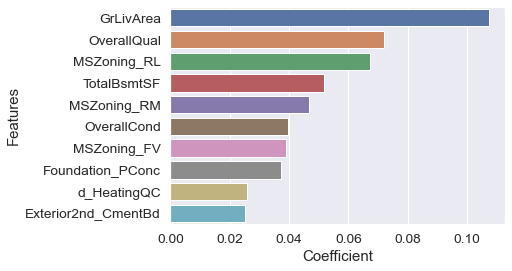

In [114]:
sns.barplot('Coefficient', 'Features',data = temp)
plt.show()

The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.

# Lasso

In [115]:
# Applying Lasso
lasso = Lasso()
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008198,0.001505,0.002403,0.000502,0.0001,{'alpha': 0.0001},-0.079176,-0.085460,-0.082057,-0.084410,...,-0.082436,0.002265,1,-0.075276,-0.072560,-0.074278,-0.073953,-0.074447,-0.074103,0.000886
1,0.003600,0.003007,0.000600,0.000490,0.0002,{'alpha': 0.0002},-0.079385,-0.085684,-0.082022,-0.084440,...,-0.082559,0.002251,2,-0.075501,-0.072679,-0.074309,-0.073936,-0.074423,-0.074170,0.000909
2,0.006456,0.007913,0.000000,0.000000,0.0003,{'alpha': 0.0003},-0.079495,-0.085933,-0.082046,-0.084491,...,-0.082691,0.002272,3,-0.075652,-0.072861,-0.074428,-0.073973,-0.074510,-0.074285,0.000902
3,0.006251,0.007656,0.000000,0.000000,0.0004,{'alpha': 0.0004},-0.079382,-0.085904,-0.082076,-0.084447,...,-0.082732,0.002255,5,-0.075775,-0.072994,-0.074604,-0.074027,-0.074651,-0.074410,0.000907
4,0.006747,0.005053,0.001403,0.001203,0.0005,{'alpha': 0.0005},-0.079125,-0.085996,-0.082108,-0.084406,...,-0.082723,0.002342,4,-0.075865,-0.073161,-0.074796,-0.074168,-0.074762,-0.074551,0.000884


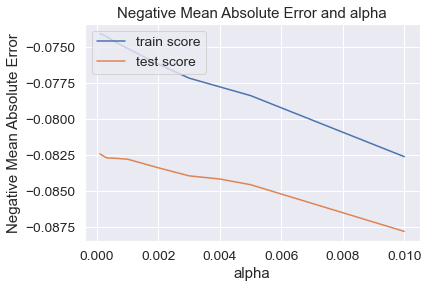

In [117]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [118]:
model_cv.best_params_

{'alpha': 0.0001}

In [119]:
# check the coefficient values with lambda = 0.0003

alpha = 0.0003

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01057487,  0.00756392,  0.02117356,  0.07371366,  0.03948186,
        0.02129318, -0.00913263,  0.05158037,  0.10914205,  0.00895451,
        0.0103534 ,  0.01676337,  0.02539452,  0.01066771,  0.00744371,
       -0.01656294, -0.02581576,  0.01369568,  0.01724042,  0.0117309 ,
        0.01462336,  0.01207035,  0.01402981,  0.01405028,  0.02569332,
        0.01365725, -0.01294146,  0.02345   ,  0.00998081,  0.02364455,
       -0.01171158,  0.01150267, -0.00353176, -0.01543831, -0.00913381,
       -0.0239608 , -0.02928952, -0.00037798,  0.01438816,  0.01054384,
        0.01314449,  0.01880711,  0.03689561,  0.0149146 ,  0.04066139,
        0.01948535,  0.06958708,  0.04771432, -0.03790247, -0.00421057,
       -0.03604222, -0.00765139, -0.01236479,  0.02168741, -0.00709664,
       -0.00661836,  0.01650457, -0.01577502,  0.00749547,  0.0169787 ])

In [120]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.015662130803545962

In [121]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_data = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_data = lasso_data[lasso_data['Coefficient'] != 0.00]
lasso_data.reset_index(drop=True, inplace=True)
lasso_data

,Features,Coefficient
0,MSSubClass,-0.0106
1,LotFrontage,0.0076
2,LotArea,0.0212
3,OverallQual,0.0737
4,OverallCond,0.0395
5,BsmtFinSF1,0.0213
6,BsmtUnfSF,-0.0091
7,TotalBsmtSF,0.0516
8,GrLivArea,0.1091
9,BsmtFullBath,0.0090


In [122]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.010574874875722791,
 'LotFrontage': 0.00756391725844225,
 'LotArea': 0.02117355796074046,
 'OverallQual': 0.07371365868382056,
 'OverallCond': 0.03948186172924729,
 'BsmtFinSF1': 0.021293179786390445,
 'BsmtUnfSF': -0.009132634161463248,
 'TotalBsmtSF': 0.051580371072375265,
 'GrLivArea': 0.10914205452132475,
 'BsmtFullBath': 0.008954514951404362,
 'FullBath': 0.010353395772090528,
 'HalfBath': 0.01676336989709167,
 'GarageCars': 0.025394516817520748,
 'WoodDeckSF': 0.010667705021492299,
 'OpenPorchSF': 0.007443713772214237,
 'PastRemodelled': -0.016562935410287232,
 'AgeofBuiltOrRemodelled': -0.025815764919401494,
 'OldOrNewGarage': 0.013695675464803984,
 'd_FireplaceQu': 0.017240415916873447,
 'd_SaleCondition': 0.011730899340562508,
 'd_BsmtExposure': 0.014623360513820833,
 'd_KitchenQual': 0.012070351209438371,
 'd_BsmtQual': 0.014029813668555168,
 'd_BsmtFinType1': 0.014050277576271211,
 'd_HeatingQC': 0.025693323669959536,
 'd_GarageFinish': 0.013657245089141495

In [126]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_data.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select=15)          
rfe = rfe.fit(X_train_lasso, y_train)

In [127]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1 = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1 = temp1.loc[temp1['rfe_support'] == True]
temp1.reset_index(drop=True, inplace=True)

temp1['Coefficient'] = temp1['Features'].apply(find)
temp1 = temp1.sort_values(by=['Coefficient'], ascending=False)
temp1 = temp1.head(10)
temp1

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.109142
1,OverallQual,True,1,0.073714
13,MSZoning_RL,True,1,0.069587
4,TotalBsmtSF,True,1,0.051580
14,MSZoning_RM,True,1,0.047714
12,MSZoning_FV,True,1,0.040661
2,OverallCond,True,1,0.039482
11,Foundation_PConc,True,1,0.036896
8,d_HeatingQC,True,1,0.025693
6,GarageCars,True,1,0.025395


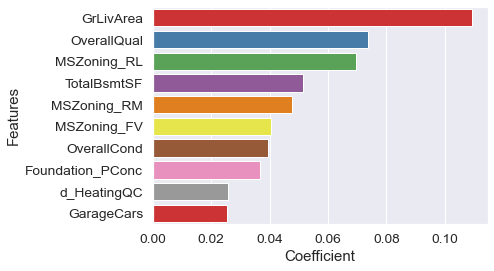

In [128]:
# bar plot to determine the variables that would affect pricing most using ridge regression
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

# Conclusion :
##### The optimal lambda value for Ridge and Lasso:

- Ridge - 7
- Lasso - 0.0001

###### The Mean Squared error for Ridge and Lasso :

- The Mean Squared Error of Lasso is slightly lower than that of Ridge
- Ridge - 0.0158
- Lasso - 0.0156



The coefficient value of one of lasso's feature is almost 0.
So Lasso is better than Ridge.

